Table of content

- Import libraries/dependencies, import dataset
- Data Wrangling & preprocessing
- EDA & Statistical Analysis
- Clustering
- Modeling

Attribute Information in dataset:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**Import Libraries / Dependencies & Dataset**

In [ ]:
# Import libraries/dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import scipy.stats
import scipy.stats as st
from statsmodels.stats import weightstats as stests
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset 
data = pd.read_csv('day.csv')
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [ ]:
# instant is just index numbers, so we set instant to indexes
data = data.set_index('instant')

In [ ]:
# lets look at the info on the data set. 
#The info method allows us to look at the data types of all the feature, the number of non-null values, 
#and the total number of entries
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [ ]:
data.dteday = pd.to_datetime(data.dteday) # convert 'dteday' feture to pandas datetime, than abtrate the month of day for each entire
data["day"] = [i.day for i in data.dteday] # extract the month of day for each entire and create new column
data.drop(['registered','casual'],axis=1, inplace=True) # drop irrelevant columns 
data.weathersit = data.weathersit.map({1:'Clear',2:'Mist',3:'Light_Snow_Rain',4:'Heavy_Snow_Rain'}) # convert 
data.season = data.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
data.mnth = data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
data.weekday = data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})


In [ ]:
data.dtypes

dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
day                    int64
dtype: object

**EDA & Statistical Analysis**


- Univariate analysis of numerical features
- Univariate analysis of Categorical features
- Numeric to numeric bivariate statistics
- Categorical to Categorical bivariate analysis

- Hypothesis Testing 


Univariate analysis of numerical features emp, atemp, hum, windspeed:
- Check for spread/distribution
- Check for central tendencies
- Check for outliers

In [ ]:
# Check for spread/distrubtion and central tendencies of numerical feature temp, atemp, hum, windspeed
print('Descriptive Statistics for temp feature','\n', data.temp.describe())
print('\n')
print('Descriptive Statistics for atemp feature','\n', data.atemp.describe())
print('\n')
print('Descriptive Statistics for hum feature','\n', data.hum.describe())
print('\n')
print('Descriptive Statistics for windspeed feature', '\n',data.windspeed.describe())

Descriptive Statistics for temp feature 
 count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64


Descriptive Statistics for atemp feature 
 count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64


Descriptive Statistics for hum feature 
 count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64


Descriptive Statistics for windspeed feature 
 count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64


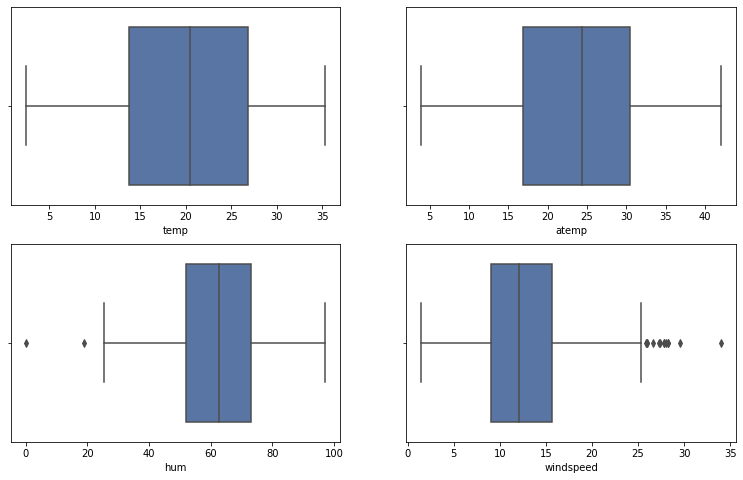

In [ ]:
# Boxplot spread of numerical features temp, atemp, hum, windspeed 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13,8))
sns.boxplot(x="temp",data=data, ax=ax1, palette = 'deep')
sns.boxplot(x="atemp",data=data, ax=ax2, palette = 'deep')
sns.boxplot(x="hum", data=data, ax=ax3, palette = 'deep')
sns.boxplot(x="windspeed",data=data, ax=ax4, palette = 'deep')

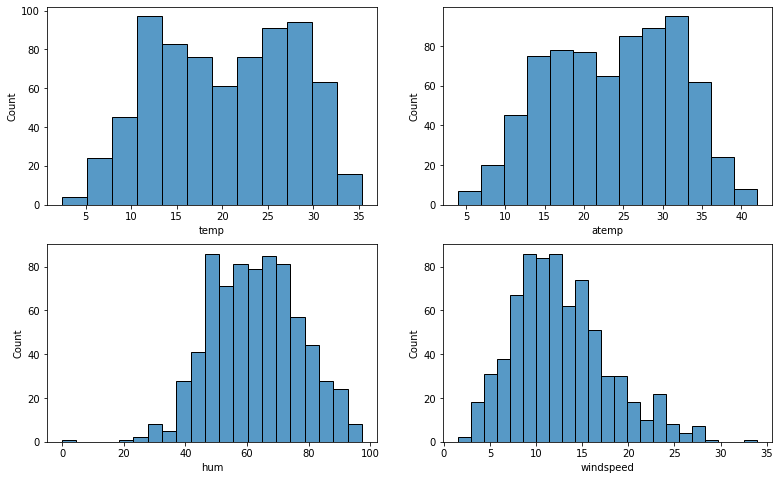

In [ ]:
# Histgram Distrubiton of numerical features temp, atemp, hum, windspeed
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13,8))
sns.histplot(x="temp",data=data, ax=ax1, palette = 'deep')
sns.histplot(x="atemp",data=data, ax=ax2, palette = 'deep')
sns.histplot(x="hum", data=data, ax=ax3, palette = 'deep')
sns.histplot(x="windspeed",data=data, ax=ax4, palette = 'deep')

Outlier detection - Tukey IQR Method

Outliers/ extreme values in data are defined as: Values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)

In [ ]:
# function to help Identify outliers 
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(data['temp'])
print(np.sort(tukey_values))
print('\n')
print(len(tukey_values),'Outliers detected for temp feature using tukey fance method')

[]


0 Outliers detected for temp feature using tukey fance method


In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(data['atemp'])
print(np.sort(tukey_values))
print('\n')
print(len(tukey_values),'Outliers detected for atemp feature using tukey fance method')

[]


0 Outliers detected for atemp feature using tukey fance method


In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(data['hum'])
print(np.sort(tukey_values))
print('\n')
print(len(tukey_values),'Outliers detected for hum feature using tukey fance method')

[ 0.     18.7917]


2 Outliers detected for hum feature using tukey fance method


In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(data['windspeed'])
print(np.sort(tukey_values))
print('\n')
print(len(tukey_values),'Outliers detected for windspeed feature using tukey fance method')

[25.833257 25.917007 26.000489 26.666536 27.292182 27.417204 27.7916
 27.833743 27.999836 28.250014 28.292425 29.584721 34.000021]


13 Outliers detected for windspeed feature using tukey fance method


Univariate analysis of Categorical features

In [ ]:
# Lets check the number of distinct values in each qualitative feautres
qualitative = data.select_dtypes(include=['object'])
uniqueValues = qualitative.nunique()
uniqueValues = uniqueValues.to_frame()
print('Number of distinct value in each qualitative column:')
print('\n')
uniqueValues

Number of distinct value in each qualitative column:




,0
season,4
mnth,12
weekday,7
weathersit,3


In [ ]:
season = data['season'].value_counts().to_frame()
season['Percent of all season types'] = season['season'] / sum(season['season'])

weathersit = data['weathersit'].value_counts().to_frame()
weathersit['Percent of all weathersit types'] = weathersit['weathersit'] / sum(weathersit['weathersit'])

holiday = data['holiday'].value_counts().to_frame()
holiday['Percent of all holiday types'] = holiday['holiday'] / sum(holiday['holiday'])

workingday = data['workingday'].value_counts().to_frame()
workingday['Percent of all workingday types'] = workingday['workingday'] / sum(workingday['workingday'])

weekday = data['weekday'].value_counts().to_frame()
weekday['Percent of all weekday types'] = weekday['weekday'] / sum(weekday['weekday'])


In [ ]:
season

,season,Percent of all season types
Fall,188,0.257534
Summer,184,0.252055
Spring,180,0.246575
Winter,178,0.243836


In [ ]:
weathersit

,weathersit,Percent of all weathersit types
Clear,463,0.634247
Mist,246,0.336986
Light_Snow_Rain,21,0.028767


In [ ]:
holiday

,holiday,Percent of all holiday types
0,709,0.971233
1,21,0.028767


In [ ]:
workingday

,workingday,Percent of all workingday types
1,499,0.683562
0,231,0.316438


In [ ]:
weekday

,weekday,Percent of all weekday types
Sat,105,0.143836
Sun,105,0.143836
Mon,105,0.143836
Tue,104,0.142466
Thu,104,0.142466
Fri,104,0.142466
Wed,103,0.141096


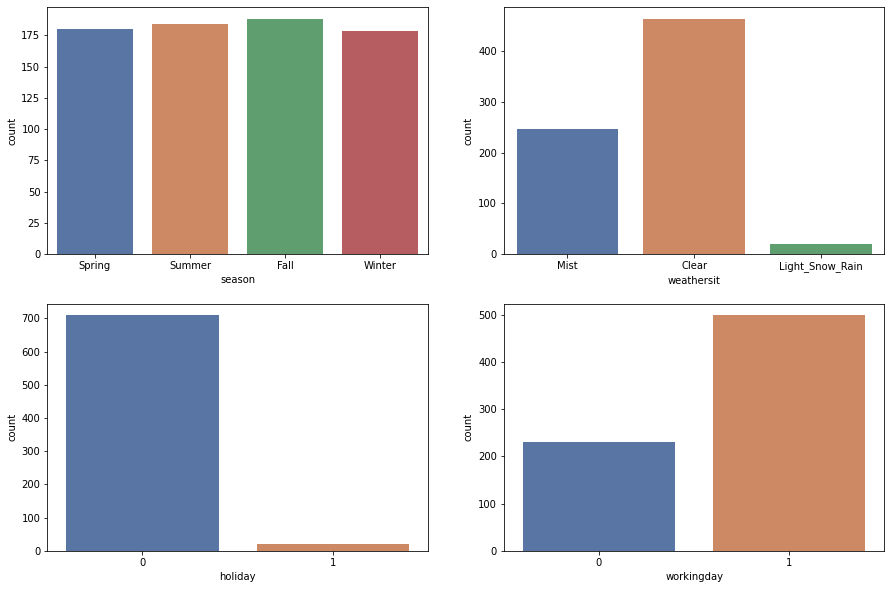

In [ ]:
# Now lets visualize distrubition using bar graphs
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
sns.countplot(x ='season', data=data, ax=ax1, palette = 'deep')
sns.countplot(x ='weathersit', data=data, ax=ax2, palette = 'deep')
sns.countplot(x ='holiday', data=data, ax=ax3, palette = 'deep')
sns.countplot(x ='workingday', data=data, ax=ax4, palette = 'deep')

**Numeric to numeric bivariate statistics**

In [ ]:
data.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day
yr,1.000000e+00,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728,-2.249057e-16
holiday,8.195345e-03,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,4.535910e-03
workingday,-2.945396e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542,4.843813e-04
temp,4.878919e-02,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044,8.189816e-02
atemp,4.721519e-02,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685,7.821203e-02
hum,-1.125471e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543,9.610618e-02
windspeed,-1.162435e-02,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,-2.736954e-02
cnt,5.697285e-01,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000,4.148415e-02
day,-2.249057e-16,0.004536,0.000484,0.081898,0.078212,0.096106,-0.027370,0.041484,1.000000e+00


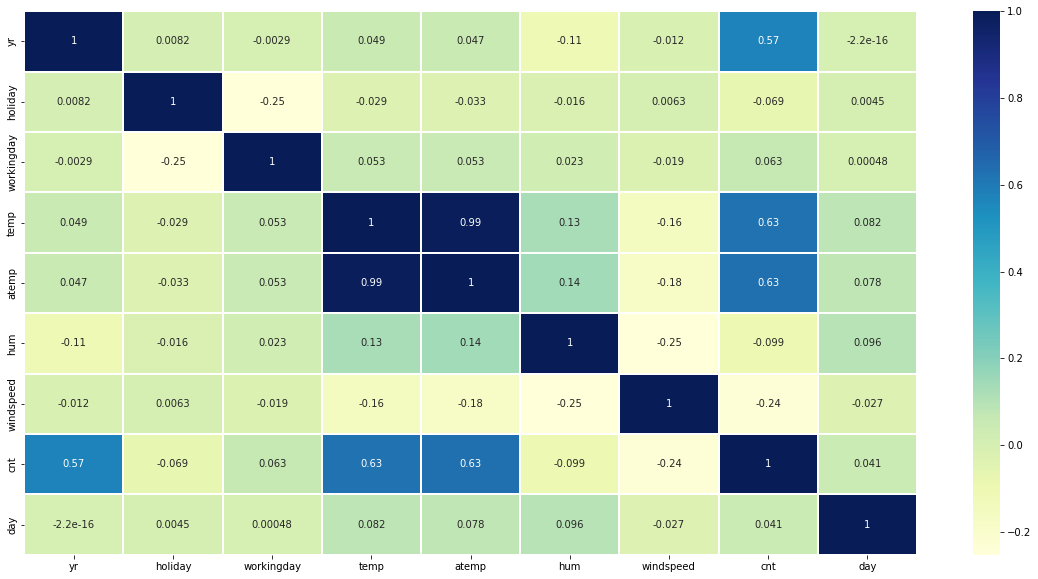

In [ ]:
#plot corrlation using heatmap 
plt.figure(figsize=(20,10))
corr = data.corr()
sns.heatmap(corr,annot= True, cmap = 'YlGnBu', linewidths=1)

In [ ]:
# function to help Identify feautres with .50% or higher correlation
indices = np.where(corr > 0.5)
indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices) if x != y and x < y]
indices

[('yr', 'cnt'), ('temp', 'atemp'), ('temp', 'cnt'), ('atemp', 'cnt')]

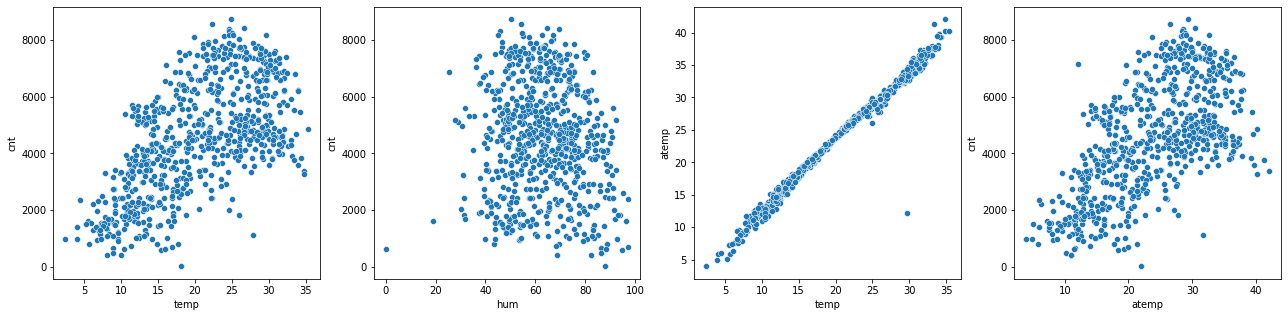

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(22,5))
sns.scatterplot(x="temp", y="cnt", data=data, ax=ax1, palette = 'deep')
sns.scatterplot(x="hum", y="cnt", data=data, ax=ax2, palette = 'deep')
sns.scatterplot(x="temp", y="atemp", data=data, ax=ax3, palette = 'deep')
sns.scatterplot(x="atemp", y="cnt", data=data, ax=ax4, palette = 'deep')
fig.show()

**Categorical to Categorical bivariate Analysis**

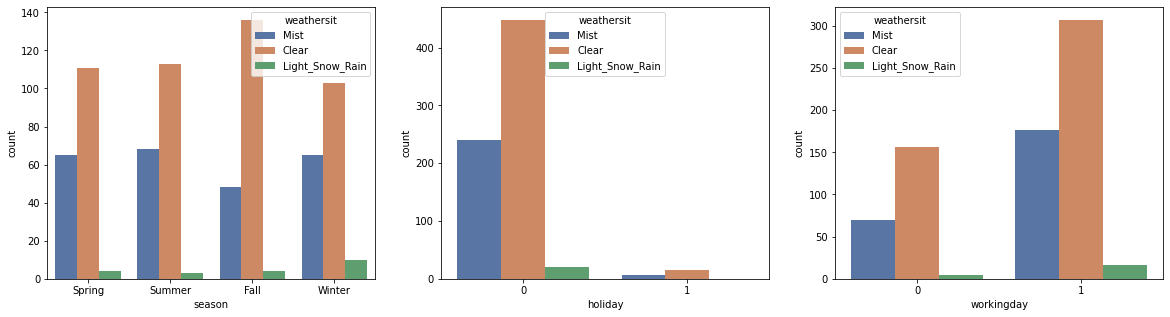

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
sns.countplot(x ='season', hue = "weathersit", data=data, ax=ax1, palette = 'deep')
sns.countplot(x ='holiday', hue = "weathersit", data=data, ax=ax2, palette = 'deep')
sns.countplot(x ='workingday', hue = "weathersit", data=data, ax=ax3, palette = 'deep')

**Categorical to Target Variable Analysis**

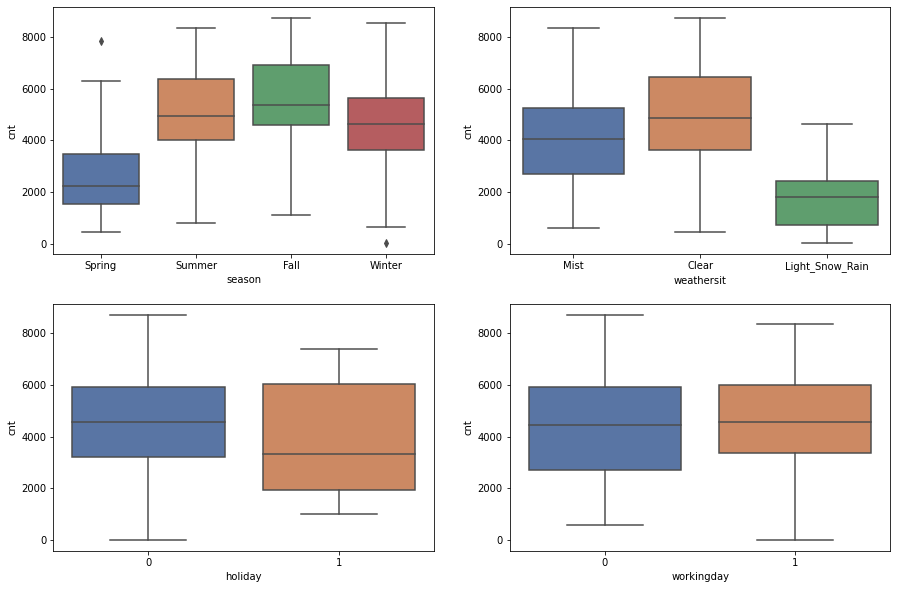

In [ ]:
#let us look at the distributions of count of bikes rented as per the season, weathersit, holiday, workingday features
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
sns.boxplot(x="season", y="cnt", data=data, ax=ax1, palette = 'deep')
sns.boxplot(x="weathersit", y="cnt", data=data, ax=ax2, palette = 'deep')
sns.boxplot(x="holiday", y="cnt", data=data, ax=ax3, palette = 'deep')
sns.boxplot(x="workingday", y="cnt", data=data, ax=ax4, palette = 'deep')

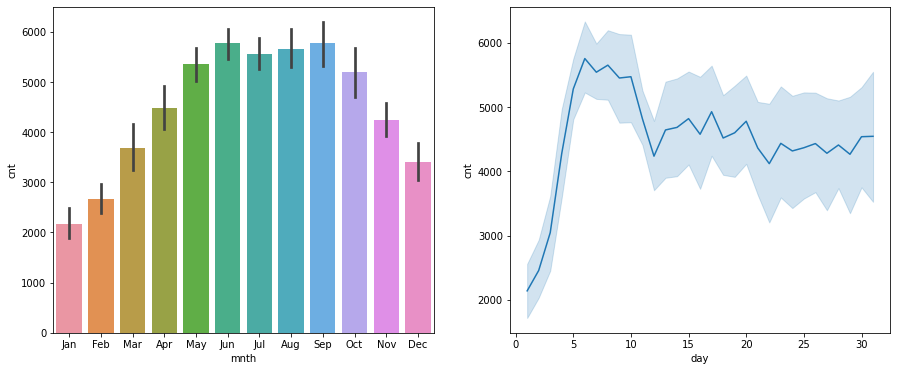

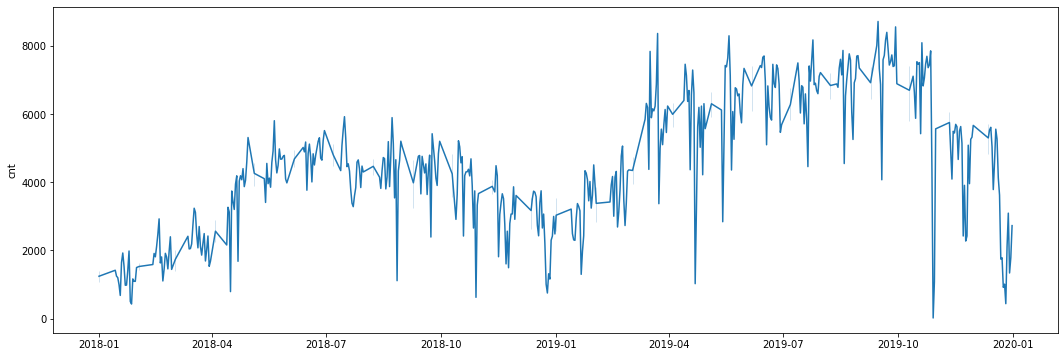

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
sns.barplot(x="mnth", y="cnt", data=data, ax=ax1)
sns.lineplot(x="day", y="cnt", data=data, ax=ax2)
fig.show()
sales = [str(i)+'-'+str(j)+'-'+str(k) for i,j,k in zip(data.day, data.mnth, data.yr.map({0:'2018',1:'2019'}))]
fig, (ax1) = plt.subplots(1, 1, figsize=(18,6))
sns.lineplot(x=pd.to_datetime(sales), y=data.cnt, ax=ax1)

**Hypothesis Testing**

We will be using the Z-test for independent samples. For the independent Z-test, the following assumptions must be met. critical level that will be used .05

Z-Test assumptions


State the hypothesis

- Ho ("there is no difference in means")
- Ha ("there is a difference in means")
- We can plot the dependent variable with a historgram

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

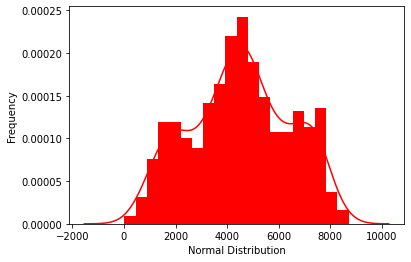

In [ ]:
ax = sns.distplot(data['cnt'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

Findings:
- cnt feature is normally Distributed

Z-Test for 2018 and 2019 means with respect to cnt feature. To see if there is a difference between the number of daily bikes rented for 2018 and 2019. 

In [ ]:
print('2018 average total bikes rented daily',data[data['yr'] == 0]['cnt'].mean())
print('2019 average total bikes rented daily',data[data['yr'] == 1]['cnt'].mean())
print('\n')

ztest , propability_value = stests.ztest(x1=data[data['yr'] == 0]['cnt'], 
                                         x2=data[data['yr'] == 1]['cnt'], 
                                         value=0, alternative='two-sided')
print('P-value:',propability_value)

2018 average total bikes rented daily 3405.7616438356163
2019 average total bikes rented daily 5610.2520547945205


P-value: 4.535377890337e-78


Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is a statistical difference between 2018 and 2019 means for cnt feature(total bikes rented). 

Now lets visualize the differences. 

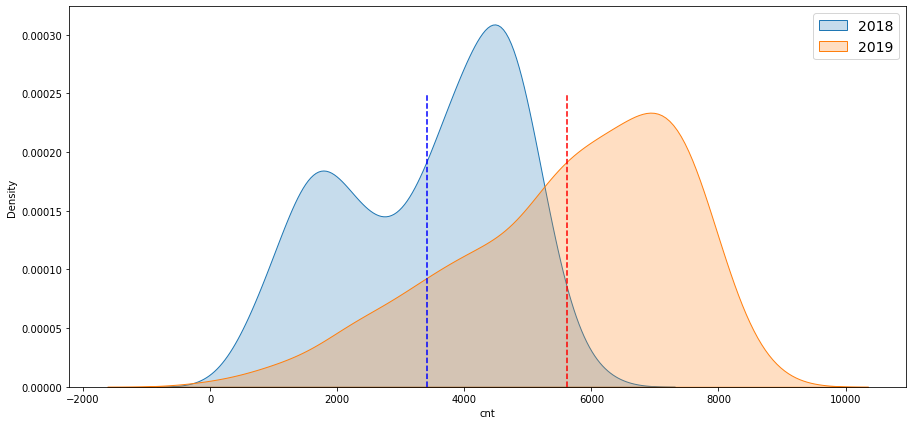

In [ ]:
plt.figure(figsize=(15,7))
sns.kdeplot(data[data['yr'] == 0]['cnt'],shade=True)
sns.kdeplot(data[data['yr'] == 1]['cnt'],shade=True)
plt.legend(['2018','2019'],fontsize=14)
plt.vlines(x=data[data['yr'] == 0]['cnt'].mean(),ymin=0,ymax=0.00025,color='blue',linestyle='--')
plt.vlines(x=data[data['yr'] == 1]['cnt'].mean(),ymin=0,ymax=0.00025,color='red',linestyle='--')

Z-Test for workingday feature with respect to cnt feature

In [ ]:
print('Average total bikes rented daily for non working days',data[data['workingday'] == 0]['cnt'].mean())
print('Average total bikes rented daily for working days',data[data['workingday'] == 1]['cnt'].mean())
print('\n')
ztest , propability_value = stests.ztest(x1=data[data['workingday'] == 0]['cnt'], 
                                         x2=data[data['workingday'] == 1]['cnt'], 
                                         value=0, alternative='two-sided')
print('P-value:',propability_value)

Average total bikes rented daily for non working days 4330.168831168831
Average total bikes rented daily for working days 4590.332665330661


P-value: 0.09087909219279217


Conclusion: Since the p-value is greater than alpha value 0.05, we fail to reject the null hypothesis as there is no statistical difference between working days and non working days means for cnt feature(total bikes rented).

ANOVA Test for weathersit and season features with respect to cnt feature

What are the assumptions and limitations of a one-way ANOVA?

- Normality – that each sample is taken from a normally distributed population
Sample independence – that each sample has been drawn independently of the other samples
- Variance equality – that the variance of data in the different groups should be the same
- Your dependent variable – here, 'cnt' feature, should be continuous

In [ ]:
# helper function to run ANOVA test between multiple groups 
def multi_anova(groups,alpha):
    from itertools import combinations
    list_anova = list(combinations(list(groups.keys()),2))
    
    for comb in list_anova:
        _, p = st.f_oneway(groups[comb[0]],groups[comb[1]])
        if p > alpha:
            print("\nANOVA Fails to reject the null hypothesis, there is no statistical difference of means for {} and {}".format(comb[0],comb[1]))
            print('P-value:',p, '>', alpha)
        else:
            print("\nWe reject the null hypothesis, there is a statistical difference of means for {} and {} as per ANOVA test result".format(comb[0],comb[1]))
            print('P-value:',p, '<', alpha)

In [ ]:
weathersit_clear = data[data['weathersit'] == 'Clear']['cnt']
weathersit_mist = data[data['weathersit'] == 'Mist']['cnt']
weathersit_lSR = data[data['weathersit'] == 'Light_Snow_Rain']['cnt']

weather_groups = {'weathersit_clear':weathersit_clear,'weathersit_mist':weathersit_mist,'weathersit_lSR':weathersit_lSR}

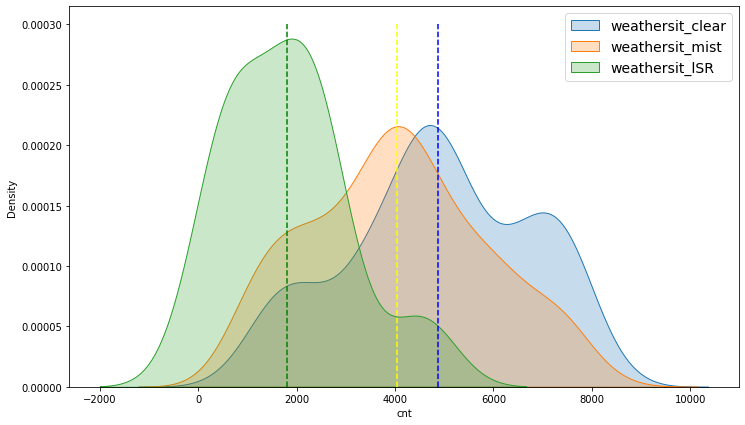

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(weathersit_clear,shade=True)
sns.kdeplot(weathersit_mist,shade=True)
sns.kdeplot(weathersit_lSR,shade=True)
plt.legend(['weathersit_clear','weathersit_mist', 'weathersit_lSR'],fontsize=14)
plt.vlines(x=weathersit_clear.mean(),ymin=0,ymax=0.0003,color='blue',linestyle='--')
plt.vlines(x=weathersit_mist.mean(),ymin=0,ymax=0.0003,color='yellow',linestyle='--')
plt.vlines(x=weathersit_lSR.mean(),ymin=0,ymax=0.0003,color='green',linestyle='--')
plt.show()

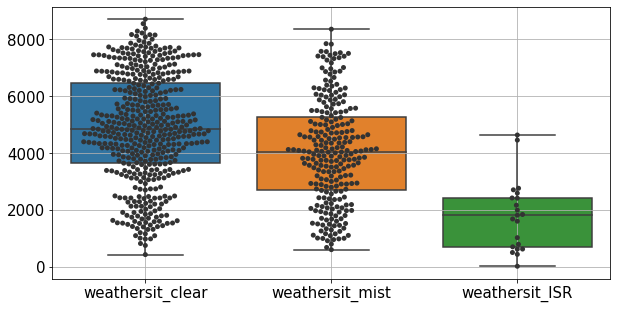

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.boxplot(data=[weathersit_clear,weathersit_mist,weathersit_lSR])
ax=sns.swarmplot(data=[weathersit_clear,weathersit_mist,weathersit_lSR],color='.2')
ax.set_xticklabels(['weathersit_clear','weathersit_mist','weathersit_lSR'],fontsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

In [ ]:
# now lets run anova test for weather at alpha of .05
multi_anova(groups = weather_groups, alpha = .05)


We reject the null hypothesis, there is a statistical difference of means for weathersit_clear and weathersit_mist as per ANOVA test result
P-value: 1.9112493346853584e-08 < 0.05

We reject the null hypothesis, there is a statistical difference of means for weathersit_clear and weathersit_lSR as per ANOVA test result
P-value: 5.446215924898237e-13 < 0.05

We reject the null hypothesis, there is a statistical difference of means for weathersit_mist and weathersit_lSR as per ANOVA test result
P-value: 6.321903227330204e-08 < 0.05


Conclusion: Since the p-value is less than 0.05 for all combinations, we will reject the null hypothesis as there is a significant evidence that at the means differ from one another in the 'weathersit' feature with respect to cnt feature.

Now lets ANOVA Test for weathersit and season features with respect to cnt feature

In [ ]:
# break up 'season' feature with respect to 'cnt features 
season_fall = data[data['season'] == 'Fall']['cnt']
season_summer = data[data['season'] == 'Summer']['cnt']
season_spring = data[data['season'] == 'Spring']['cnt']
season_Winter = data[data['season'] == 'Winter']['cnt']

season_groups = {'season_fall':season_fall,'season_summer':season_summer,'season_spring':season_spring, 'season_Winter': season_Winter}

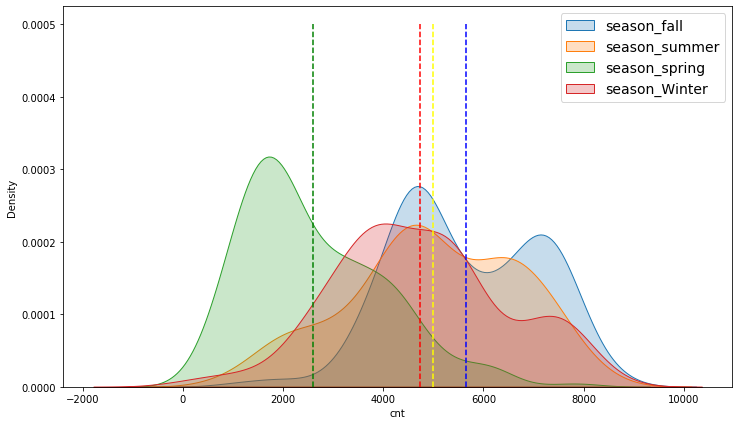

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(season_fall,shade=True)
sns.kdeplot(season_summer,shade=True)
sns.kdeplot(season_spring,shade=True)
sns.kdeplot(season_Winter,shade=True)
plt.legend(['season_fall','season_summer', 'season_spring', 'season_Winter'],fontsize=14)
plt.vlines(x=season_fall.mean(),ymin=0,ymax=0.0005,color='blue',linestyle='--')
plt.vlines(x=season_summer.mean(),ymin=0,ymax=0.0005,color='yellow',linestyle='--')
plt.vlines(x=season_spring.mean(),ymin=0,ymax=0.0005,color='green',linestyle='--')
plt.vlines(x=season_Winter.mean(),ymin=0,ymax=0.0005,color='red',linestyle='--')
plt.show()

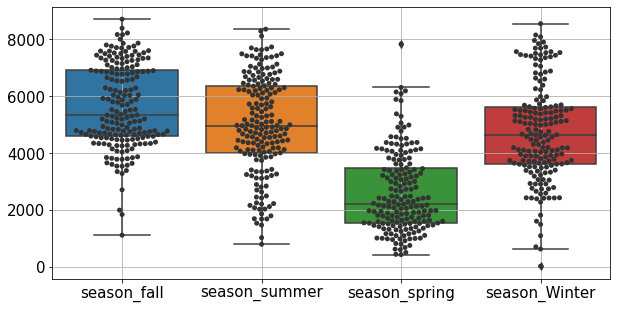

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.boxplot(data=[season_fall,season_summer,season_spring, season_Winter])
ax=sns.swarmplot(data=[season_fall,season_summer,season_spring, season_Winter],color='.2')
ax.set_xticklabels(['season_fall','season_summer','season_spring', 'season_Winter'],fontsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

In [ ]:
# now lets run anova test for season using a critical value of .05 
multi_anova(groups = season_groups, alpha = .05)


We reject the null hypothesis, there is a statistical difference of means for season_fall and season_summer as per ANOVA test result
P-value: 8.41150981151104e-05 < 0.05

We reject the null hypothesis, there is a statistical difference of means for season_fall and season_spring as per ANOVA test result
P-value: 5.006491795817368e-62 < 0.05

We reject the null hypothesis, there is a statistical difference of means for season_fall and season_Winter as per ANOVA test result
P-value: 5.778909151502718e-08 < 0.05

We reject the null hypothesis, there is a statistical difference of means for season_summer and season_spring as per ANOVA test result
P-value: 2.838057518183522e-38 < 0.05

ANOVA Fails to reject the null hypothesis, there is no statistical difference of means for season_summer and season_Winter
P-value: 0.13974231789502692 > 0.05

We reject the null hypothesis, there is a statistical difference of means for season_spring and season_Winter as per ANOVA test result
P-value: 2.0648

Conclusion: The p-value is less than 0.05 for all combinations expect for season_summer and season_Winter, we will reject the null hypothesis as there is a significant evidence that the means differ expect for season_summer and season_Winter in the season feature with repect to cnt feature.

**Model**

In [ ]:
#label encode categorical features
object_list = data.select_dtypes(include = 'object').columns
le = LabelEncoder()
for f in object_list:
  data[f] = le.fit_transform(data[f].astype(str))


# split x(independent features) and y(dependent feature)
x = data.drop(['dteday', 'cnt'], axis=1)
y = data.cnt

# scale x(independent Features) using StandardScaler(standardization) scales each feature that the distribution centered around 0, 
# with a standard deviation of 1.
X = StandardScaler().fit(x).transform(x.astype(float))


# split training and testing subsets and put test size to .15% 
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=.15, random_state=1)


# dict for algos that will be used 
algo_list = {linear_model.LinearRegression(): 'Linear Regression', 
             RandomForestRegressor(): 'Random Forest Regressor', 
             GradientBoostingRegressor(): 'Gradient Boosting Regressor'}

# train, test and calculate R^2 score for each regression algo in the above dict 
for key in algo_list:
  key.fit(train_x, train_y)
  pred = key.predict(test_x)
  print('R^2 SCORE for', algo_list[key], round(100 * key.score(test_x, test_y), 2))

R^2 SCORE for Linear Regression 86.33
R^2 SCORE for Random Forest Regressor 91.18
R^2 SCORE for Gradient Boosting Regressor 89.46


**Model** 


LR Model

R^2 SCORE: 86.33




Text(0.5, 0, 'cnt')

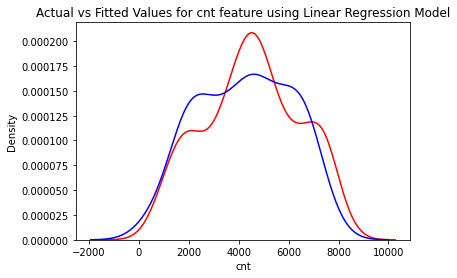

In [ ]:
LM = linear_model.LinearRegression()
LM.fit(train_x, train_y)
predlr = LM.predict(test_x)


#Evaluation 
print('R^2 SCORE:', round(100* LM.score(test_x, test_y), 2))
print('\n')


# graph predicted vs actual value
axs  =  sns.distplot(data['cnt'],hist=False,color='r',label="Actual Value")
sns.distplot(predlr,hist=False, color="b", label="Fitted Values",ax=axs)
plt.title('Actual vs Fitted Values for cnt feature using Linear Regression Model')
plt.xlabel('cnt')

            feature_importances
Features                       
temp                1180.267513
yr                   996.579008
season               430.390422
mnth                 177.515081
atemp                113.597100
workingday            36.050791
weekday              -37.847336
day                  -53.409774
weathersit          -119.179830
holiday             -123.760470
windspeed           -292.548848
hum                 -329.906019




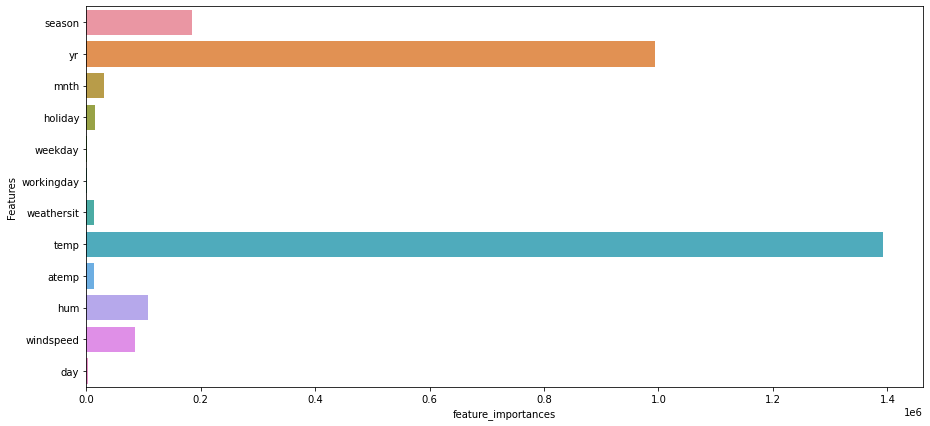

In [ ]:
d = {'Features':x.columns,'feature_importances':LM.coef_}
LM_FI = pd.DataFrame(d)
LM_FI = LM_FI.set_index('Features')
print(LM_FI.sort_values(by ='feature_importances', ascending=False))
print('\n')

plt.figure(figsize=(15,7))
sns.barplot(x=LM_FI["feature_importances"]**2, y=LM_FI.index, data=LM_FI)


Random Forest Regressor

R^2 SCORE: 90.34




Text(0.5, 0, 'cnt')

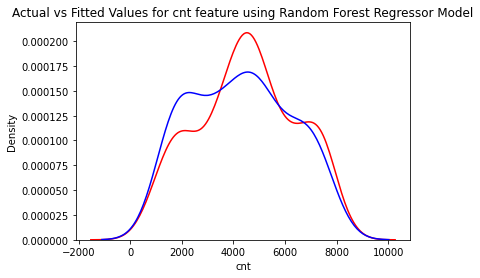

In [ ]:
RFR = RandomForestRegressor()
RFR.fit(train_x, train_y)
predRFR = RFR.predict(test_x)


#Evaluation 
print('R^2 SCORE:', round(100 * RFR.score(test_x, test_y), 2))
print('\n')

# graph predicted vs actual value
axs  =  sns.distplot(data['cnt'],hist=False,color='r',label="Actual Value")
sns.distplot(predRFR,hist=False, color="b", label="Fitted Values",ax=axs)
plt.title('Actual vs Fitted Values for cnt feature using Random Forest Regressor Model')
plt.xlabel('cnt')

            feature_importances
Features                       
temp                   0.383743
yr                     0.288490
atemp                  0.110903
hum                    0.074551
season                 0.059125
windspeed              0.030192
mnth                   0.015975
day                    0.014621
weekday                0.008492
weathersit             0.005833
workingday             0.005162
holiday                0.002911




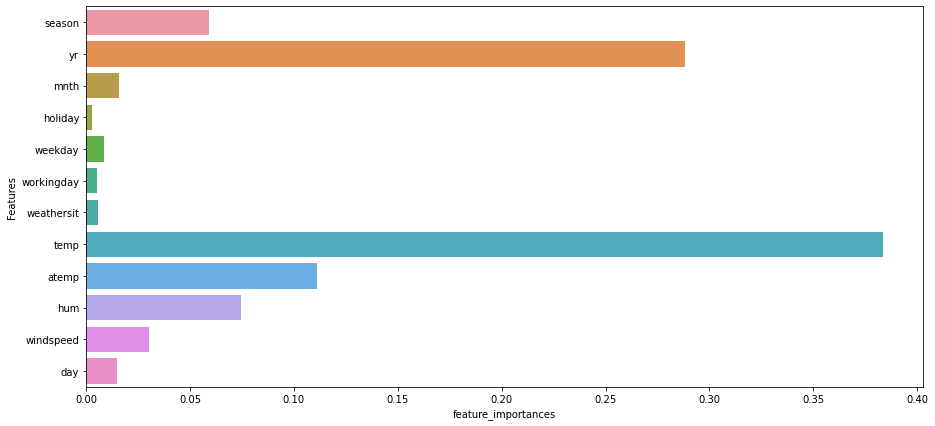

In [ ]:
d = {'Features':x.columns,'feature_importances':RFR.feature_importances_}
RFR_FI = pd.DataFrame(d)
RFR_FI = RFR_FI.set_index('Features')
print(RFR_FI.sort_values(by ='feature_importances', ascending=False))
print('\n')

plt.figure(figsize=(15,7))
sns.barplot(x="feature_importances", y=RFR_FI.index, data=RFR_FI)

Gradient Boosting Regressor

R^2 SCORE: 89.42




Text(0.5, 0, 'cnt')

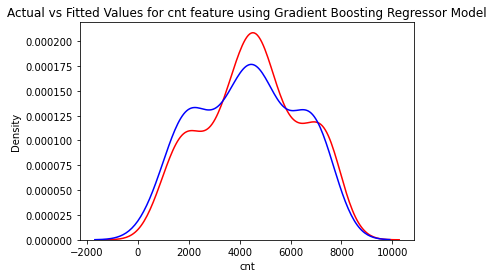

In [ ]:
GradientBoostingRegressor

GBR = GradientBoostingRegressor()
GBR.fit(train_x, train_y)
predGBR = GBR.predict(test_x)


#Evaluation 
print('R^2 SCORE:', round(100 * GBR.score(test_x, test_y), 2))
print('\n')

# graph predicted vs actual value
axs  =  sns.distplot(data['cnt'],hist=False,color='r',label="Actual Value")
sns.distplot(predGBR,hist=False, color="b", label="Fitted Values",ax=axs)
plt.title('Actual vs Fitted Values for cnt feature using Gradient Boosting Regressor Model')
plt.xlabel('cnt')




            feature_importances
Features                       
temp                   0.413833
yr                     0.311424
hum                    0.078005
atemp                  0.063401
season                 0.060409
windspeed              0.026651
mnth                   0.012660
weathersit             0.012657
day                    0.008156
weekday                0.006359
workingday             0.004939
holiday                0.001504




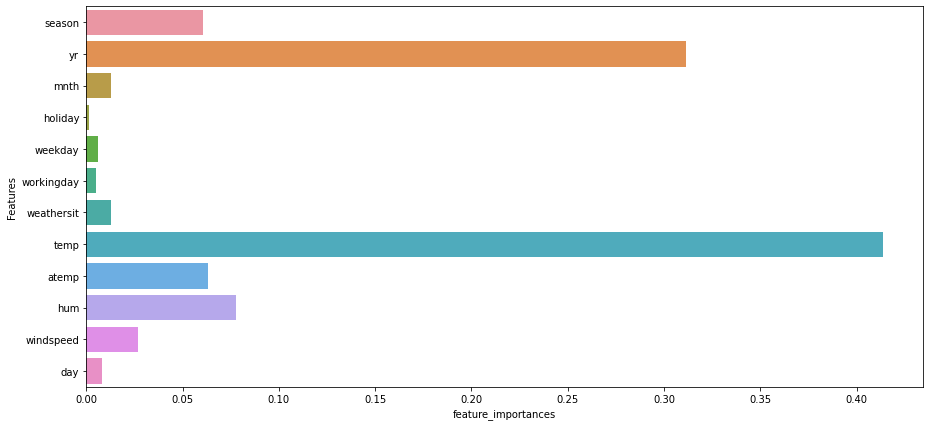

In [ ]:
d = {'Features':x.columns,'feature_importances':GBR.feature_importances_}
GBR_FI = pd.DataFrame(d)
GBR_FI = GBR_FI.set_index('Features')
print(GBR_FI.sort_values(by ='feature_importances', ascending=False))
print('\n')
plt.figure(figsize=(15,7))
sns.barplot(x="feature_importances", y=GBR_FI.index, data=GBR_FI)